We are trying to answer three questions based on data collected from Twitter by Kaggle.
https://www.kaggle.com/rgupta09/world-cup-2018-tweets

This dataset contains a random collection of 530k tweets starting from the Round of 16 till the World Cup Final that took place on 15 July, 2018 & was won by France.

The Questions: 
- What are the most 10 hashtags mentioned during the 2018 World Cup?
- Does the number followers help to get the most likes? Does high number of followers is a key to get the most high likes in 2018 world cup?
- What are the most countries tweets in the 2018 world cup?


In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./fifa.csv')

In [152]:
df_nonull.to_csv ('./2018_worlcup_tweets_smallset.csv', index = None, header=True)

First: Lets Examine the dataset.

In [153]:
df.isnull().sum()

ID                       0
lang                     0
Date                     0
Source                   0
len                      0
Orig_Tweet               0
Tweet                  551
Likes                    0
RTs                      0
Hashtags             61543
UserMentionNames     74159
UserMentionID        74159
Name                    55
Place               139290
Followers                0
Friends                  0
dtype: int64

In [154]:
df.head()

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,Cayleb,Accra,861,828
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the wi...,scores the winning penalty to send into the qu...,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF","FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Bogor,667,686
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game....,Tonight we have big game,0,488,worldcup,"Javier Fernandez,Evgeni Plushenko","javierfernandez,EvgeniPlushenko",??,NaN,65,67
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe...,We get stronger Turn the music up now We got t...,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague","EXO,FIFA World Cup ?","weareoneEXO,FIFAWorldCup",Frida Carrillo,"Zapopan, Jalisco",17,89
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,tar,NaN,137,216


In [155]:
df.shape

(530000, 16)

Data Storage:
The collected tweets have been consolidated into a single dataset & shared as a Comma Separated Values file "FIFA.csv".
Each tweet is uniquely identifiable by its ID, & characterized by the following attributes, per availability:
- "Lang" - Language of the tweet
- "Date" - When it was tweeted
- "Source" - The device/medium where it was tweeted from
- "len" - The length of the tweet
- "Orig_Tweet" - The tweet in its original form
- "Tweet" - The updated tweet after pre-processing
- "Likes" - The number of likes received by the tweet (till the time the extraction was done)
- "RTs" - The number of times the tweet was shared
- "Hashtags" - The Hashtags found in the original tweet
- "UserMentionNames" & "UserMentionID" -  Extracted from the original tweet


It also includes the following attributes about the person that the tweet is from:
- "Name" & "Place" of the user
- "Followers" - The number of followers that the user account has
- "Friends" - The number of friends the user account has

Question#1:
- What are the most 10 hashtags mentioned during the 2018 World Cup?
    We notice that in Hashtags field, hashtages seprated by comma, which we need to saperate. But first we need to free the field from null records.

In [156]:
hashtags_no_nulls = df.dropna(subset=['Hashtags'], axis=0)

In [157]:
hashtags_no_nulls.isnull().sum()

ID                       0
lang                     0
Date                     0
Source                   0
len                      0
Orig_Tweet               0
Tweet                  466
Likes                    0
RTs                      0
Hashtags                 0
UserMentionNames     71668
UserMentionID        71668
Name                    46
Place               121982
Followers                0
Friends                  0
dtype: int64

In [158]:
def split_column(df, column):
    ''' Split column by ,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(','))

    return column_series

In [159]:
splited_hashtags = split_column(hashtags_no_nulls, 'Hashtags')

In [160]:
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip().lower())
            
    return objects

In [161]:
hashtags_list = disarray(splited_hashtags)
hashtags_list

['worldcup',
 'por',
 'eng',
 'worldcup',
 'worldcup',
 'powerbyexo',
 'worldcup',
 'fifastadiumdj',
 'xiuminleague',
 'worldcup',
 'por',
 'eng',
 'bramex',
 'russia',
 'powerbyexo',
 'worldcup',
 'fifastadiumdj',
 'xiuminleague',
 'manofthematch',
 'croden',
 'worldcup',
 'worldcup',
 'worldcup',
 'power',
 'exo',
 'sportstalk',
 'sportstalkradio',
 'nba',
 'nhl',
 'mlb',
 'nfl',
 'pga',
 'worldcup',
 'croden',
 'worldcup',
 'worldcup',
 'worldcup',
 'power',
 'exo',
 'spain',
 'russia',
 'comrades',
 'soccer',
 'worldcup',
 'worldcup2018',
 'futbol',
 'layleague',
 'powerbyexo',
 'worldcup',
 'fifastadiumdj',
 'periscope',
 'freespeech',
 'realnews',
 'msm',
 'closernation',
 'worldcup',
 '1a',
 'sundayfunday',
 'periscope',
 'golive',
 'croatia',
 'maga',
 'powerbyexo',
 'worldcup',
 'fifastadiumdj',
 'chenleague',
 'worldcup',
 'history',
 'russia',
 'spain',
 'worldcup',
 'worldcup',
 'rus',
 'worldcup',
 'worldcup',
 'worldcup',
 'powerbyexo',
 'worldcup',
 'fifastadiumdj',
 'ch

In [162]:
from collections import Counter

def group_list(data_list, label):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{label:key, 'Count': value} for key, value in grouped_list.items()]
    
    return grouped_dict

In [163]:
grouped_hashtags = group_list(hashtags_list,"Hashtags")

In [164]:
df_grouped_hashtags = pd.DataFrame(grouped_hashtags)

In [165]:
sorted_hashtags = df_grouped_hashtags.sort_values(by=['Count'], ascending=False)


No handles with labels found to put in legend.


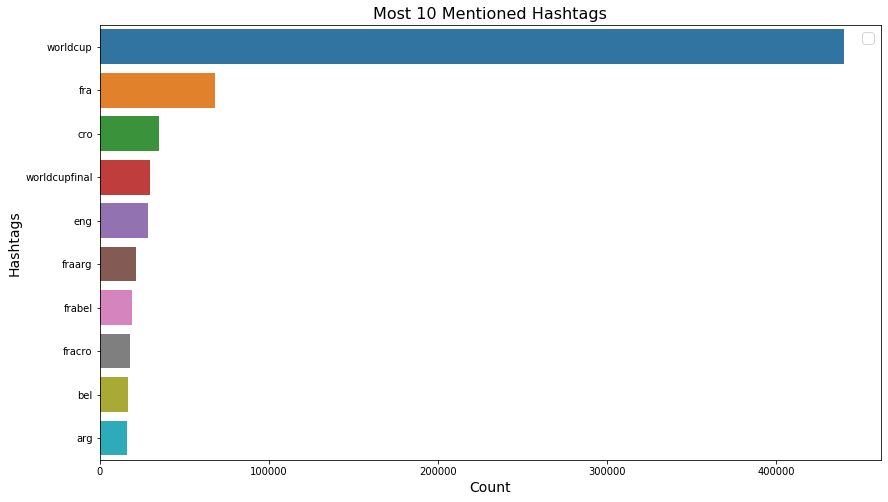

In [166]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.barplot(x = 'Count', 
            y = 'Hashtags',
            data = sorted_hashtags.head(10))

plt.xlabel("Count", fontsize = 14)
plt.ylabel("Hashtags", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most 10 Mentioned Hashtags', size = 16)
plt.show()

Question#2:
- Does the number followers help to get the most likes? Does high number of followers is a key to get the most high likes in 2018 world cup?


In [167]:
df.isnull().sum()

ID                       0
lang                     0
Date                     0
Source                   0
len                      0
Orig_Tweet               0
Tweet                  551
Likes                    0
RTs                      0
Hashtags             61543
UserMentionNames     74159
UserMentionID        74159
Name                    55
Place               139290
Followers                0
Friends                  0
dtype: int64

In [168]:
df_followers_desc = df.sort_values(by=['Followers'], ascending=False)
followers_filtered = df_followers_desc.filter(['Likes','Followers','Name'],axis=1)
followers_filtered.head(10)

,Likes,Followers,Name
300565,288,40674307,CNN
298878,125,40674306,CNN
322590,0,34276268,ESPN
75729,4968,29314573,FC Barcelona
376156,2065,28832598,FC Barcelona
262946,0,23661420,BBC News (World)
171615,46,23473419,The Economist
316304,65,19868018,Reuters Top News
320337,159,19868017,Reuters Top News
302027,55,19865478,Reuters Top News


In [169]:
df_likes_desc = df.sort_values(by=['Likes'], ascending=False)
likes_filtered = df_likes_desc.filter(['Likes','Followers','Name'],axis=1)

likes_filtered.head(10)

,Likes,Followers,Name
470179,27042,6970800,FIFA World Cup
431310,23882,17988185,Premier League
446280,13954,6970722,FIFA World Cup
98306,10126,2160915,Harry Kane
486297,8201,2943449,Tottenham Hotspur
63413,7647,6668848,FIFA World Cup ?
435321,7481,14916831,9GAG
386062,5403,18221036,Manchester United
75729,4968,29314573,FC Barcelona
74534,4853,1215126,SPORF


We can notice that the number of followers can play a good role in getting high likes but it is not always. For example, SPORF account has 1215126 follwers and got on a tweet 4853 likes. While, The Economist account has 46 likes on a tweet,  which has 23473419 followers. The key on getting high likes is fans, which means accounts that has football/soccer fans are the most likely to get high likes such as Premier League, Manchester United, Barcelona, Harry Kane and so on. 

Question#3
- What are the most countries tweets in the 2018 world cup?

In [170]:
df.isnull().sum()

ID                       0
lang                     0
Date                     0
Source                   0
len                      0
Orig_Tweet               0
Tweet                  551
Likes                    0
RTs                      0
Hashtags             61543
UserMentionNames     74159
UserMentionID        74159
Name                    55
Place               139290
Followers                0
Friends                  0
dtype: int64

In [171]:
df_place_no_null = df.dropna(subset=['Place'], axis=0)

In [172]:
grouped_place = group_list(df_place_no_null['Place'], "Place")
grouped_place

[{'Place': 'Accra', 'Count': 174},
 {'Place': 'Bogor', 'Count': 45},
 {'Place': 'Zapopan, Jalisco', 'Count': 15},
 {'Place': 'Mount Olympus ', 'Count': 1},
 {'Place': 'Lima, Peru', 'Count': 532},
 {'Place': 'Meme City ', 'Count': 1},
 {'Place': 'Bulacan, Central Luzon', 'Count': 2},
 {'Place': 'Barcelona', 'Count': 100},
 {'Place': 'Mumbai, India', 'Count': 1119},
 {'Place': 'The netherlands ', 'Count': 4},
 {'Place': 'Thailand', 'Count': 678},
 {'Place': 'Orange County, CA', 'Count': 30},
 {'Place': 'The Ohio State University', 'Count': 4},
 {'Place': 'Toledo, OH', 'Count': 16},
 {'Place': 'Toronto, Ontario', 'Count': 818},
 {'Place': 'Anambra, Nigeria', 'Count': 28},
 {'Place': 'Look out your window....', 'Count': 2},
 {'Place': 'en tu corazón :v', 'Count': 3},
 {'Place': 'www.behance.net/925png', 'Count': 1},
 {'Place': '???(?????)', 'Count': 1},
 {'Place': 'Varia Agung, Lampung', 'Count': 5},
 {'Place': '???????, ??????', 'Count': 12},
 {'Place': 'Bogotá, D.C., Colombia', 'Count': 

In [173]:
df_grouped_place = pd.DataFrame(grouped_place)
sorted_grouped_place = df_grouped_place.sort_values(by=['Count'], ascending=False)

In [174]:
sorted_grouped_place.head()

,Count,Place
201,4953,"Lagos, Nigeria"
239,4701,"London, England"
110,3619,Nigeria
461,3225,London
212,2851,India


No handles with labels found to put in legend.


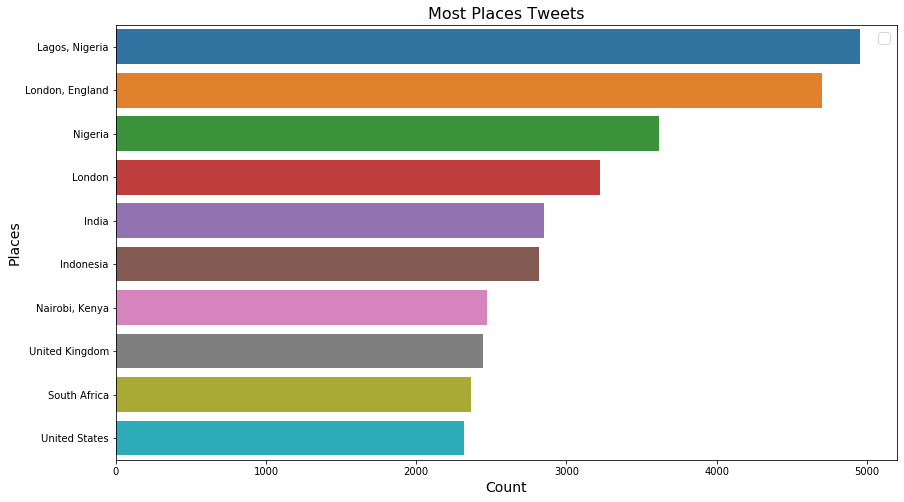

In [175]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.barplot(x = 'Count', 
            y = 'Place',
            data = sorted_grouped_place.head(10))

plt.xlabel("Count", fontsize = 14)
plt.ylabel("Places", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most Places Tweets', size = 16)
plt.show()